In [1]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

# Load the TensorBoard notebook extension
%load_ext tensorboard

%aimport models.AEFIT
%aimport models.base
%aimport Dataset_QSH
# !pip install livelossplot --user


Hunch models imported
reload set for module  Hunch_utils
reload set for module  Dummy_g1data
reload set for module  Hunch_lsplot
reload set for module  Hunch_tSNEplot


In [2]:
vae = models.AEFIT.AEFIT(latent_dim=2, feature_dim=30, dprate=0., scale=1, beta=0., geometry=[20,20,10,10])
vae.load('STEP5_VAE2_disentangled')

AEFIT5 ready:


In [7]:
qsh = Dataset_QSH.Dataset_QSH()
file = ipysh.abs_builddir+'/te_db_r15u.npy'
qsh.load(file)
    
qsh.clean_up_poorcurves(5)
qsh.dim = 15
qsh.set_null(np.nan)
qsh.set_normal_positive()

ds = qsh.ds_array.map(lambda x,y: (x,x))

28838

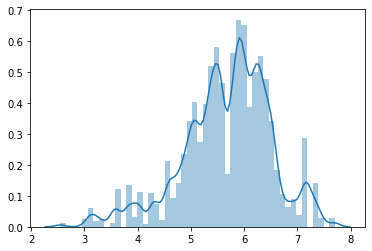

In [4]:
import seaborn as sns
sns.distplot(qsh['NS'])

q = [ x for x in qsh if x.NS > 7. ]
q[0].pulse

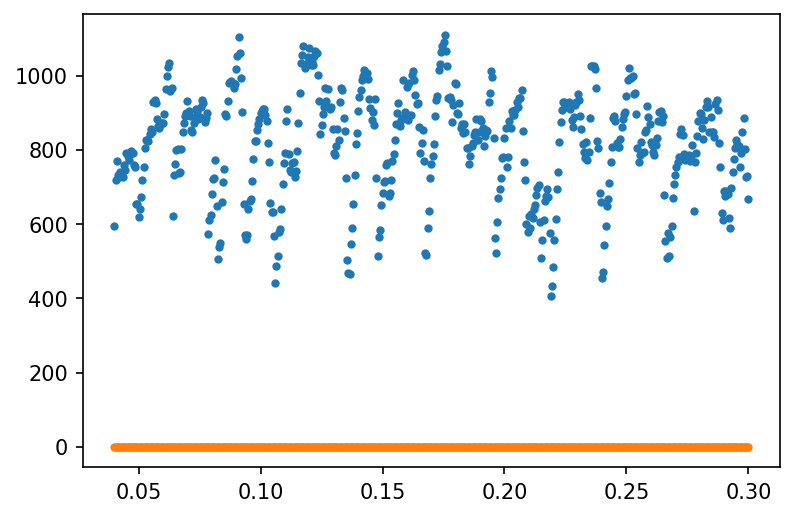

In [5]:
q = [ x for x in qsh if x.pulse == 28838 ]
fig = plt.figure('q_plot')
fig.set_dpi(150)
t = [ x['start']*1e-4 for x in q ]
t_centro = [ x['tcentro'] for x in q ]
i_qsh = [ x['i_qsh'] for x in q ]

plt.plot(t,t_centro, '.')
plt.plot(t,i_qsh, '.')

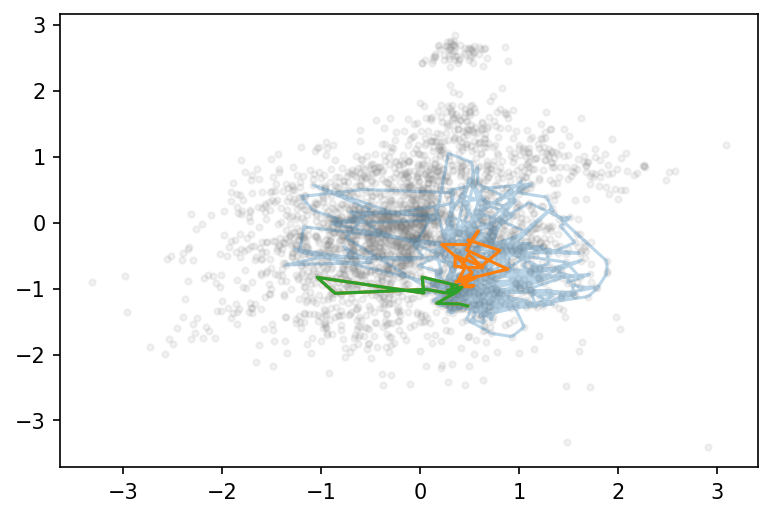

<Figure size 900x600 with 0 Axes>

In [10]:

def get_teprel_qsh(pulse=28838, qsh_id=0, tag='prel~te:15'):
    return [ x[tag] for x in qsh if x.pulse == pulse and x.i_qsh == qsh_id ]
    
def plot_qsh(pulse, id, npt=None, **kargs):    
    q_0 = get_teprel_qsh(pulse, id)
    if npt is None: npt = slice(0, len(q_0), 1)
    if isinstance(npt, range): ntp = slice(ntp.start,ntp.stop, 1)
    q_0 = q_0[npt]
    ds_0 = tf.data.Dataset.from_tensor_slices(q_0).batch(len(q_0))
    x_0  = [x for x in ds_0.take(1)][0]
    ls_0,_ = vae.encode(x_0, training=False)
    x,y = ls_0[:,0], ls_0[:,1]
    plt.plot(x,y,**kargs)

    
    
    
fig = plt.figure('trajectory')
fig.set_dpi(150)

for i in ds.batch(100).take(30):
    m,_ = vae.encode(i,training=False)
    plt.plot(m[:,0],m[:,1],'.',c='grey', alpha=0.1)


plot_qsh(28838,0, alpha=0.3)
plot_qsh(28838,0,slice(0,45))
plot_qsh(28838,0,slice(30,45))
# plot_qsh(28838,1)
# plot_qsh(31401,2)
# plot_qsh(31401,3)
# plot_qsh(31401,4)


fig = plt.figure('test')
fig.set_dpi(150)


